# Loan Approval Prediction

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Data collection and processing

In [2]:
#load dataset
df = pd.read_csv('dataset/loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
df.shape

(381, 13)

In [4]:
#first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
#lastr 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#features/columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
#total missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

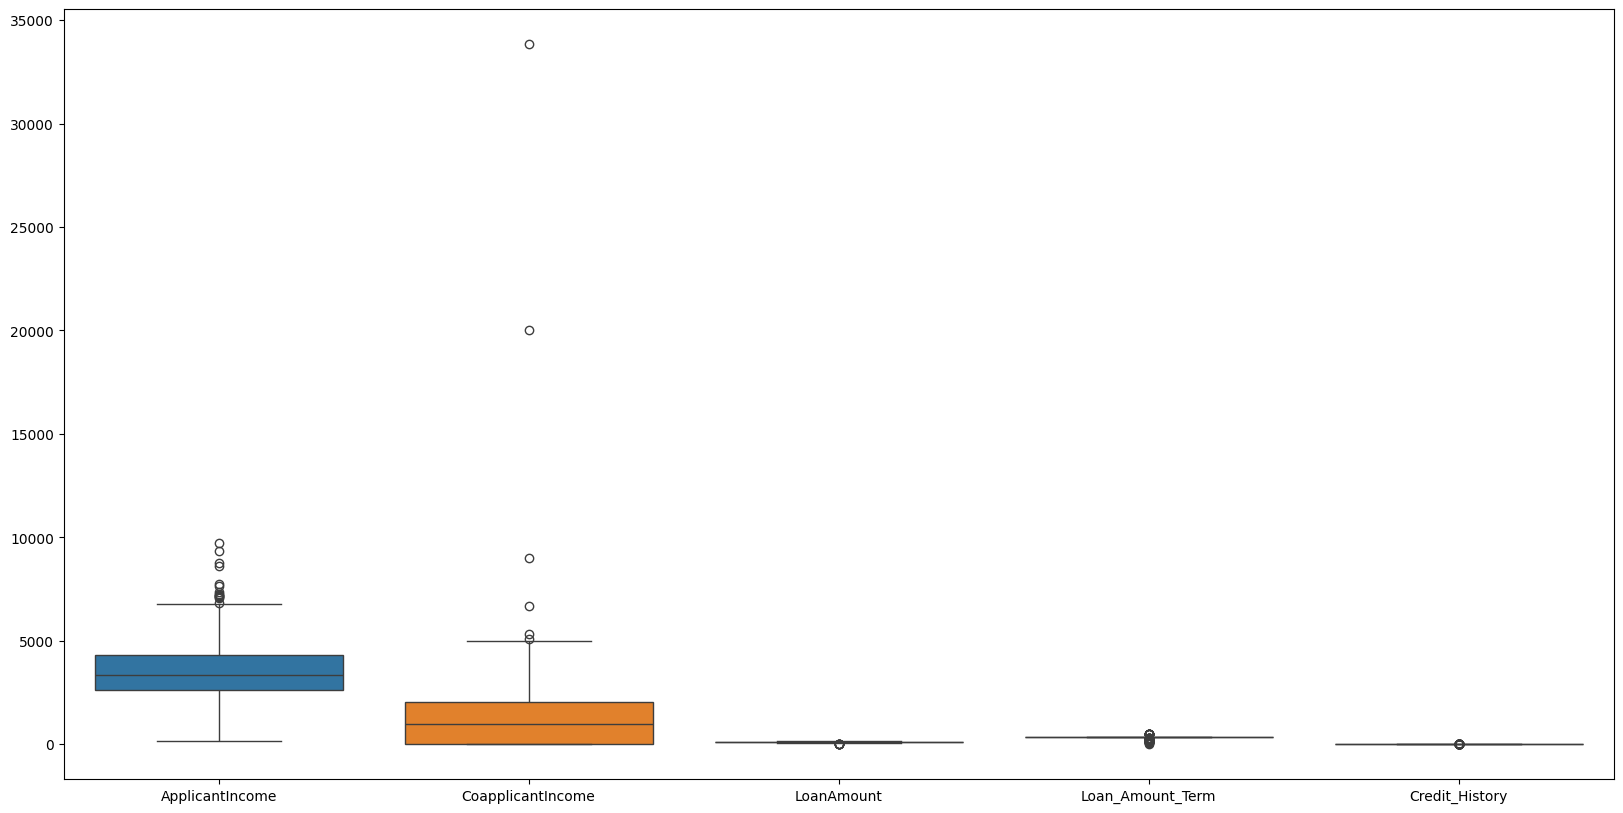

In [9]:
#check outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [10]:
#filling null values of numerical datatype
#median is less sensitive to outliers and mean is more sensitive to outliers
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['LoanAmount'].median()

110.0

In [12]:
df['LoanAmount'].mean()

104.98687664041995

In [13]:
#filling null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [14]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [15]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [16]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data visualization

number of people who took loan by gender
Gender
Male      296
Female     85
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\3734075083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='hsv')


<Axes: xlabel='Gender', ylabel='count'>

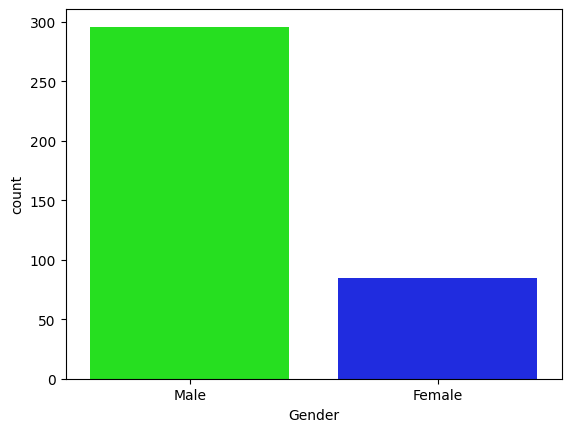

In [20]:
print('number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='hsv')

number of people who took loan by martial status
Married
Yes    228
No     153
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\1292789182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='hsv')


<Axes: xlabel='Married', ylabel='count'>

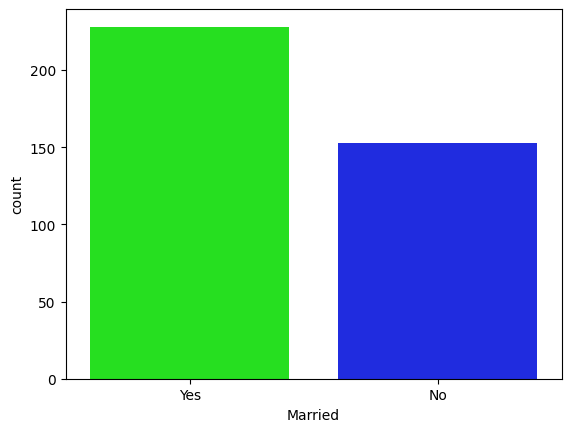

In [21]:
print('number of people who took loan by martial status')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='hsv')

number of people who took loan by education
Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\1368828941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='hsv')


<Axes: xlabel='Education', ylabel='count'>

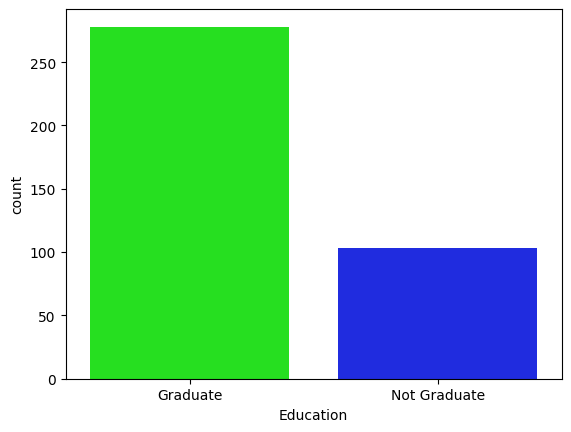

In [22]:
print('number of people who took loan by education')
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette='hsv')

### correlation

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_df.corr()

# Display the correlation matrix
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.107705,0.004444
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001893,0.022630
LoanAmount,0.270681,0.114936,1.000000,0.122913,-0.046473
Loan_Amount_Term,-0.107705,0.001893,0.122913,1.000000,-0.011864
Credit_History,0.004444,0.022630,-0.046473,-0.011864,1.000000
